<a href="https://colab.research.google.com/github/ipanditi/First-Language-Model/blob/main/MLP_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing Multi-Layer Perceptron for a dataset comprising 17000 words using n-gram model (n upto 5) that is with max. of 4 context words**

Citing : [link text](https://jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [1]:
#import modules
import torch
import torch.nn.functional as F #Neural Net
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset names.txt that is uploaded
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#Build the vocabulary of characters and mappings to/from integers that is stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.']  = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [76]:
#Build the dataset
block_size = 3 #trigram model
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '----->', itos[ix])
    context = context[1:] + [ix] #Crop and append
#Convert lists to tensor for better mathematical manipulations
X = torch.tensor(X) 
Y = torch.tensor(Y)

In [77]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [144]:
#build the dataset with splitting into train, dev, test 

def build_dataset(words):
  block_size = 3 #trigram model
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '----->', itos[ix])
      context = context[1:] + [ix] #Crop and append
  #Convert lists to tensor for better mathematical manipulations
  X = torch.tensor(X) 
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words) #shuffle the words
#define the split ratios
n1 = int(0.8*len(words)) 
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [78]:
#The Lookup table
C = torch.randn(size = (27, 2)) #For 2 Dimensions to start with
C

tensor([[-0.7872, -0.9899],
        [ 0.9569, -0.2821],
        [-1.4482, -1.1168],
        [ 1.6477, -2.3975],
        [ 1.4547, -0.2418],
        [ 0.5566,  1.1038],
        [ 1.5440,  1.0555],
        [-1.2984, -0.1236],
        [ 0.4210,  1.9507],
        [-1.2860, -0.8402],
        [-0.7276,  0.5507],
        [ 0.4952, -0.8904],
        [ 0.8063, -1.0262],
        [-0.1337, -1.8445],
        [-0.2556,  0.0621],
        [-0.8917,  1.0852],
        [ 0.1634,  0.0369],
        [ 0.3101, -2.0099],
        [-0.2294, -0.4149],
        [ 2.5116, -0.9048],
        [ 0.7199,  0.2209],
        [ 0.6134, -0.9499],
        [ 1.5843, -1.2671],
        [-1.2594, -0.2633],
        [-0.5201,  0.0832],
        [ 0.7872,  1.8268],
        [ 0.6802,  1.5113]])

In [79]:
C[5]

tensor([0.5566, 1.1038])

In [80]:
f = F.one_hot(torch.tensor(5), num_classes=27).float()
f

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
f @ C 
#For the first layer: f being the first layer and C being the weight matrix

tensor([0.5566, 1.1038])

Which is same as C[5] itself

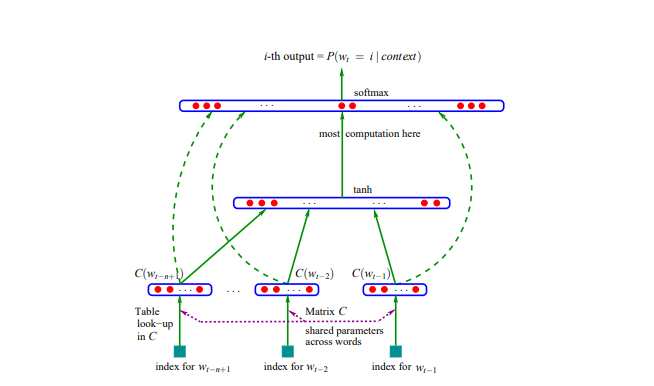

In [145]:
C[Xtr]

tensor([[[ 1.0191e-01,  7.3272e-01],
         [ 1.0191e-01,  7.3272e-01],
         [ 1.0191e-01,  7.3272e-01]],

        [[ 1.0191e-01,  7.3272e-01],
         [ 1.0191e-01,  7.3272e-01],
         [-5.5632e-02, -2.2842e-01]],

        [[ 1.0191e-01,  7.3272e-01],
         [-5.5632e-02, -2.2842e-01],
         [ 1.1948e-01, -3.0991e-01]],

        ...,

        [[ 3.3066e-01, -1.7693e-01],
         [-8.0796e-01, -1.0169e-01],
         [-4.0086e-01,  9.1266e-02]],

        [[-8.0796e-01, -1.0169e-01],
         [-4.0086e-01,  9.1266e-02],
         [ 4.1486e-01, -5.1437e-01]],

        [[-4.0086e-01,  9.1266e-02],
         [ 4.1486e-01, -5.1437e-01],
         [-1.2550e-01, -4.6372e-04]]], grad_fn=<IndexBackward0>)

In [146]:
emb = C[Xtr]
emb.shape

torch.Size([182625, 3, 2])

In [84]:
W1 = torch.randn((6, 100)) #6=3*2 , 100 is taken arbitrarily which is no. of neurons
b1 = torch.rand(100) #Randomized bias

In [85]:
'''Matrix Multiplication
emb*W1 + b1 but wait!
emb.shape = (32,3,2)
W1.shape = (6,100) it will be foolish to even try this matmul
Thus we need to transform / concatenate those 2 matrices of 3 into 6
i.e, emb.shape(32,6)
W1.shape(6,100)
emb * W1.shape = (32,100)
emb*W1 + b1.shape = (32,100)'''


'Matrix Multiplication\nemb*W1 + b1 but wait!\nemb.shape = (32,3,2)\nW1.shape = (6,100) it will be foolish to even try this matmul\nThus we need to transform / concatenate those 2 matrices of 3 into 6\ni.e, emb.shape(32,6)\nW1.shape(6,100)\nemb * W1.shape = (32,100)\nemb*W1 + b1.shape = (32,100)'

Refer torch.cat: [link text](https://pytorch.org/docs/stable/generated/torch.cat.html)

In [86]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([228146, 2]), torch.Size([228146, 2]), torch.Size([228146, 2]))

These three matrices together give us the 3rd dimenion (32,3,2)

In [87]:
#Concatenate these three matrices into one
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim = 1).shape

torch.Size([228146, 6])

YAYYYY HACKED, BUT!


WHAT IF WE USE A 4-GRAM MODEL OR A GENERAL N GRAM MODEL HUH!


THUS WE NEED TO GENERALIZE IT, TORCH TO RESCUE,


USE torch.unbind() : [link text](https://pytorch.org/docs/stable/generated/torch.unbind.html#torch.unbind) 

THIS REMOVES A TENSOR DIMENSION

In [88]:
torch.unbind(emb,1)

(tensor([[-0.7872, -0.9899],
         [-0.7872, -0.9899],
         [-0.7872, -0.9899],
         ...,
         [ 0.6802,  1.5113],
         [ 0.6802,  1.5113],
         [ 0.7872,  1.8268]]), tensor([[-0.7872, -0.9899],
         [-0.7872, -0.9899],
         [ 0.5566,  1.1038],
         ...,
         [ 0.6802,  1.5113],
         [ 0.7872,  1.8268],
         [ 0.6802,  1.5113]]), tensor([[-0.7872, -0.9899],
         [ 0.5566,  1.1038],
         [-0.1337, -1.8445],
         ...,
         [ 0.7872,  1.8268],
         [ 0.6802,  1.5113],
         [-0.5201,  0.0832]]))

Them gives the split tensors thus removing a dimension

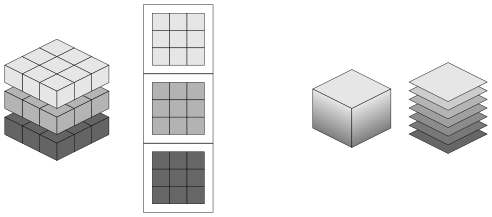

In [89]:
torch.cat(torch.unbind(emb, 1), 1).shape #Very inefficient coz it creates new memories

torch.Size([228146, 6])

In [90]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [91]:
a.shape

torch.Size([18])

In [92]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [93]:
a.view(3,3,2) # = torch.unbind(a(9,2))

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [94]:
a.storage() #This is how tensor is represented in the computer memory

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

torch.view() : [link text](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)

View in whatever dimension you would like to view. This is very much efficient

In [96]:
emb.view(-1,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [97]:
h = emb.view(-1, 6) @W1 + b1
h

tensor([[ 7.2496, -3.1850,  0.0955,  ..., -2.2427, -2.0980, -1.6052],
        [ 0.5189, -1.1782, -1.5683,  ..., -2.0816, -1.7172, -1.9525],
        [ 5.6219, -3.9016,  3.1726,  ..., -0.2961, -1.8164, -0.8479],
        ...,
        [-9.4089,  5.1985,  0.1980,  ...,  2.7751,  2.6338,  3.7465],
        [-8.9570,  4.9032,  0.7541,  ...,  2.8690,  2.5894,  3.9131],
        [-4.1210,  4.1892,  1.5874,  ...,  3.0168,  2.6868,  4.5435]])

**Our Final Hidden layer code**

In [98]:
#Let's not hard code it and lets add the non-linearity tanh
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[ 1.0000, -0.9966,  0.0952,  ..., -0.9777, -0.9703, -0.9225],
        [ 0.4769, -0.8269, -0.9167,  ..., -0.9694, -0.9375, -0.9605],
        [ 1.0000, -0.9992,  0.9965,  ..., -0.2878, -0.9485, -0.6900],
        ...,
        [-1.0000,  0.9999,  0.1954,  ...,  0.9923,  0.9897,  0.9989],
        [-1.0000,  0.9999,  0.6376,  ...,  0.9936,  0.9888,  0.9992],
        [-0.9995,  0.9995,  0.9198,  ...,  0.9952,  0.9908,  0.9998]])

**Final layer implementation**

In [99]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [100]:
logits = h @ W2 + b2
logits

tensor([[-5.2050, -6.7886, -5.1678,  ..., -1.4685,  4.8052, -5.6749],
        [-4.6479,  4.6227, 11.8894,  ..., -4.6151, -4.5866, -9.8426],
        [-1.9229, -5.6574, -5.0424,  ...,  2.6005,  8.7698, -2.7304],
        ...,
        [ 0.9214, 11.4519,  6.4857,  ..., -0.0747, -1.1133, -0.0446],
        [ 2.8566, 10.2913,  2.7647,  ...,  2.0133, -1.4418,  2.0347],
        [ 1.9494,  4.4013, -1.6611,  ...,  9.2920,  6.2227,  4.8582]])

In [101]:
logits.shape

torch.Size([228146, 27])

In [102]:
#softmax
counts = logits.exp()
prob = counts/ counts.sum(1, keepdim=True)
prob.shape

torch.Size([228146, 27])

In [103]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [104]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [106]:
loss = prob[torch.arange(228146), Y].log().mean()
loss

tensor(-16.4873)

**Summarizing the whole network**

In [147]:
Xtr.shape, Ytr.shape #Dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [219]:
g = torch.Generator().manual_seed(214783647) #for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g) #Tune the no. of neurons to get a desired output
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [220]:
sum(p.nelement() for p in parameters)

11897

In [221]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,6) @ (6,100) = (32,100)
logits = h@ W2 + b2 #(32,27)
#counts = logits.exp()
#prob = counts/ counts.sum(1, keepdims=True)
#loss = -prob[torch.arange(32), Y].log().mean()
'''Cross entropy will cluster all the above 3 lines of code into one'''
loss = F.cross_entropy(logits, Ytr)
loss

tensor(24.7952)

But why exactly do we use cross entropy

In [166]:
#Example
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp() #Imagine e^100 lol
probs = counts/ counts.sum()
probs

tensor([0., 0., 0., nan])

Says Not A Number xD

In [167]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

Says infinity

In [222]:
for p in parameters:
  p.requires_grad = True

In [223]:
for _ in range(100):
  #forward pass
  emb = C[Xtr] #(32,3,2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,6) @ (6,100) = (32,100)
  logits = h@ W2 + b2 #(32,27)
  loss = F.cross_entropy(logits, Ytr)
  print(f"The loss in the {_}th iteration is : {loss.item()}")

  #Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  for p in parameters:
    p.data += -0.1 * p.grad

The loss in the 0th iteration is : 24.79523277282715
The loss in the 1th iteration is : 22.970579147338867
The loss in the 2th iteration is : 22.184894561767578
The loss in the 3th iteration is : 20.981307983398438
The loss in the 4th iteration is : 20.26346206665039
The loss in the 5th iteration is : 19.613370895385742
The loss in the 6th iteration is : 18.831703186035156
The loss in the 7th iteration is : 18.25197410583496
The loss in the 8th iteration is : 17.649085998535156
The loss in the 9th iteration is : 17.143938064575195
The loss in the 10th iteration is : 16.67503547668457
The loss in the 11th iteration is : 16.277387619018555
The loss in the 12th iteration is : 15.833781242370605
The loss in the 13th iteration is : 15.52667236328125
The loss in the 14th iteration is : 15.136666297912598
The loss in the 15th iteration is : 14.932953834533691
The loss in the 16th iteration is : 14.551732063293457
The loss in the 17th iteration is : 14.258146286010742
The loss in the 18th iter

In [224]:
logits.max(1)

torch.return_types.max(
values=tensor([ 8.3024, 15.0142, 15.0000,  ..., 15.6104, 18.2981, 14.5162],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 12, 26,  ..., 24, 14,  1]))

In [225]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

predicted and actual indices actually match to some extent 

But we can see that the first index is predicted wrong because ... -> e for emma and ...-> o for olivia

**Now do it for the whole dataset instead of just 5 names in it but that's a very large computation to do so let's employ batch wise gradient descent**

In [172]:
torch.randint(0,X.shape[0], (32,))

tensor([201675,  12325, 178273, 131694,  42268, 141256, 139432,  64390,    481,
         90949, 134589, 159187,  72175, 206556, 166752,  86584,  70182, 110936,
         32697, 178367, 150593, 151389, 185084,  26081, 158865, 147647, 161776,
         39473,  35086,  15676, 150227, 202982])

In [226]:
#Batchwise Gradient Descent
for _ in range(100):

  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  #forward pass
  emb = C[Xtr[ix]] #(32,3,2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,6) @ (6,100) = (32,100)
  logits = h@ W2 + b2 #(32,27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(f"The loss in the {_}th iteration is : {loss.item()}")

  #Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  for p in parameters:
    p.data += -0.1 * p.grad

The loss in the 0th iteration is : 6.068474292755127
The loss in the 1th iteration is : 6.896415710449219
The loss in the 2th iteration is : 6.94061279296875
The loss in the 3th iteration is : 5.119189262390137
The loss in the 4th iteration is : 8.792823791503906
The loss in the 5th iteration is : 6.580467700958252
The loss in the 6th iteration is : 9.625308990478516
The loss in the 7th iteration is : 7.695591449737549
The loss in the 8th iteration is : 6.183511257171631
The loss in the 9th iteration is : 9.065324783325195
The loss in the 10th iteration is : 6.862722873687744
The loss in the 11th iteration is : 7.436983585357666
The loss in the 12th iteration is : 8.850601196289062
The loss in the 13th iteration is : 8.110248565673828
The loss in the 14th iteration is : 8.600396156311035
The loss in the 15th iteration is : 8.489513397216797
The loss in the 16th iteration is : 6.169605255126953
The loss in the 17th iteration is : 8.389955520629883
The loss in the 18th iteration is : 9.7

Let's optimize this a bit:

So the first problem is how to find a good initial learning rate, how do we do it?

In [174]:
#say
lre = torch.linspace(-3, 0, 1000) #Gives 1000 numbers between -3 and 0
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [236]:
lri, lossi, stepi = [], [], []

In [273]:
#Batchwise Gradient Descent with variable learning rate
for i in range(200000):

  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  #forward pass
  emb = C[Xtr[ix]] #(32,3,2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,6) @ (6,100) = (32,100)
  logits = h@ W2 + b2 #(32,27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(f"The loss in the {i}th iteration is : {loss.item()}")

  #Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update with a variable learning rate
  #lr = lrs[i]
  lr = 0.177 if i<100000 else 0.0177 #best estimated lr
  for p in parameters:
    p.data += -lr * p.grad

  #track status
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

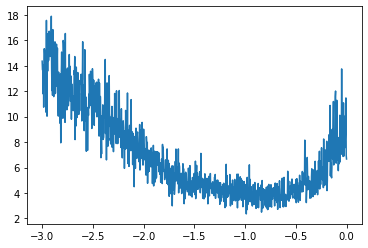

In [238]:
plt.plot(lri, lossi)

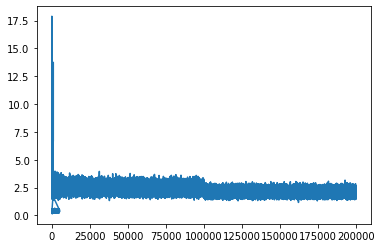

In [274]:
plt.plot(stepi, lossi)

Looking at the graph -0.75 looks like a good learning rate exponent thus we can use a learning rate of 10**(-0.75) = 0.177

In [275]:
#Use Dev set to train the hyperparameters
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @  W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1581, grad_fn=<NllLossBackward0>)

Seems pretty good with decaying learning rate and most importantly

The loss on the training set and the dev sety is pretty much same which means...

YAYYYYY! WE ARE NOT OVERFITTING ANYMORE

OUR NETOWRK HAS FINALLY LEARNED TO GO ON ITS OWN INSTEAD OF MEMORIZING TE DATASET BEING SCARED OF US xD

#To optimize further to reduce and actually avoid overfitting split the dataset
#Into training, dev/validation and test sets roughly in the ratios 80%, 10% and 10%
#Training dataset is used to train the parameters of the model
#The Development set is used to train the hyperparameters of the model
#Test is used to evaluate the model's accuracy

**NOW LET US INCREASE THE SIZE OF OUR NEURAL NET, ITS PRETTY SMALL RIGHT NOW, GROW UP KIDDO**

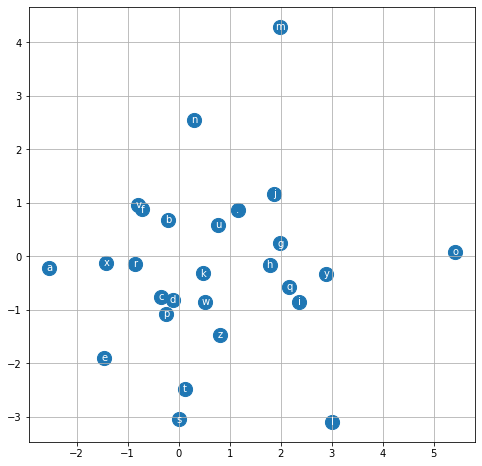

In [276]:
#Let us visualize what the NN has done
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [281]:
#The best part : Let's sample from the model
g = torch.Generator().manual_seed(2147483647 + 10) #Smoothing factor 10, highly smoothed!

for i in range(20):
  out = []
  context = [0] * block_size #initialize with all ...
  while True:
    emb = C[torch.tensor([context])] #(1, block_size, d)
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim=1) #Better because it uses cross entropy
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if(ix==0):
      break
  print(''.join(itos[i] for i in out))

carmah.
aar.
hariffirley.
tatyah.
cassie.
rahuel.
deliyat.
kaeli.
nellara.
chaii.
das.
eve.
dham.
pory.
quinthoro.
lea.
jadbi.
wazell.
dearyn.
kakaelynn.
